# Q&A Activity Question Week -10

### Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
# Loading the csv file into a pandas dataframe.
df = pd.read_csv("employee.csv")

In [3]:
# identify some basic details of the dataset

# display the contents in the dataset
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
# The summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
# number of elements in each dimension (Rows and Columns)
df.shape

(9, 7)

In [6]:
# columns in the dataset
df.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

The employee dataset has 7 features, it includes age ,income , gender ,department ,grade amd performance score. As per the dataset has some missing values. we can treat missing values after the basic questions.

### 2. Reset the index as "name" as the index.

In [7]:
# Reset the index as "name" feature
df1 = pd.read_csv("employee.csv",index_col='name') # or we can use set_index() function - df.set_index('name')
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills

In [8]:
# slicing the data with specific names
df1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [9]:
# isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column
# check the department is having "Sales" and "Finance" values in the dataset
df1.loc[df1['department'].isin(['Sales','Finance'])] 

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [10]:
# check the condition that the employee who has more than 700 performance score
df1[df1['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [11]:
# check the condition that the employee who has more than 500 and less than 700 performance score
df1[(df1['performance_score']>500) & (df1['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [12]:
# Calculating the null values present in each columns in the dataset
df1.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [13]:
# # Display the data before missing values treatment
df1[df1.isna().any(axis=1)] # check at least one null values in a row 

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53


As you can see that there are null values present in the dataset. The features age, income and gender are having the null values. we can treat the null values.

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


From the summary of the data age and income are float data type and gender is an object data type

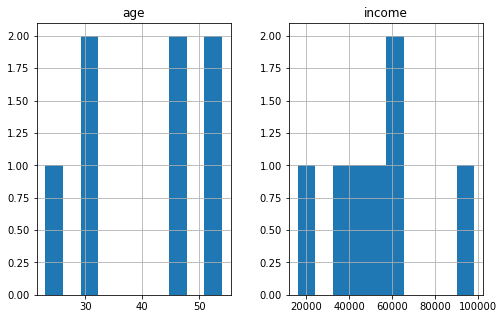

In [15]:
# we can plot the frequency table for age and income
freqgraph = df1.select_dtypes(include='float')
freqgraph.hist(figsize=(8,5))
plt.show()

From the graph we cannot identify that it is normally distributed or right or left skewed.

In [16]:
# filling missing values for age we can use median method
df1['age'] = df1['age'].fillna(df1['age'].median())

In [17]:
# check the null values treated or not
df1.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

As you can see it is treated well for missing values in age feature.

In [18]:
# so we can use a loop to treat age and income
missing = ['age','income']

for i in missing:
    df1[i] = df1[i].fillna(df1[i].median())

In [19]:
# check the null values treated or not
df1.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

As you can see age and income are treated well. And now, we can fill the missing values for gender, it is an object data type so we can use mode function to treat the missing values.

In [20]:
# Display the gender feature
df1.gender

name
Allen Smith      NaN
S Kumar            F
Jack Morgan        M
Ying Chin          F
Dheeraj Patel      F
Satyam Sharma    NaN
James Authur       F
Josh Wills         F
Leo Duck           M
Name: gender, dtype: object

In [21]:
# calculating the count of gender values in the dataset
df1.gender.value_counts()

F    5
M    2
Name: gender, dtype: int64

As per the count value for gender , there are 5 females are present in the dataset so we can use mode with a value 'F' (female).

In [22]:
# fill the missing values for gender
df1['gender'] = df1['gender'].fillna('F')

In [23]:
# check the null values treated or not in gender
df1.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [24]:
# Display the data after missing values treatment
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Now our dataset is completely treated with no null values

### 8. Check the outliers and handle outliers in performance score using Percentiles.

In [25]:
df1.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


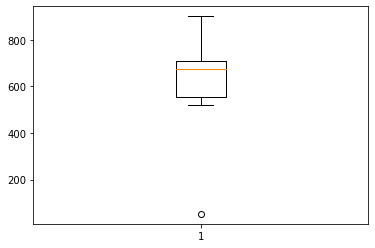

In [26]:
# for finding outliers we can use boxplot
# boxplot before removing the outliers
plt.boxplot(df1["performance_score"])
plt.show()

we can see that there is an outlier present in the performance_score feature so we need to remove the outlier.

In [27]:
# for removing outliers first we need to check the quartiles
Q1 = np.percentile(df1['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(df1['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(df1['performance_score'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

Q1:  556.0 
Q2:  674.0 
Q3:  711.0


In [28]:
# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',IQR)

IQR:  155.0


In [29]:
#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

Lower limit is :  323.5
Upper limit is :  943.5


If the value above the upper limit or below the lower limit we need to remove that outliers

In [30]:
# display the outilers
outliers = []
for i in df1['performance_score']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

In [31]:
outliers

[53]

As you can see that the value 53 is an outlier of the lower limit in the performance_score feature. Now we need to find the index value for the outliers

In [32]:
indx1 = df1['performance_score']<low_lm
df1.loc[indx1].index

Index(['James Authur'], dtype='object', name='name')

In [33]:
# drop the James Authur name index from our data set
df1.drop(['James Authur'], inplace=True)

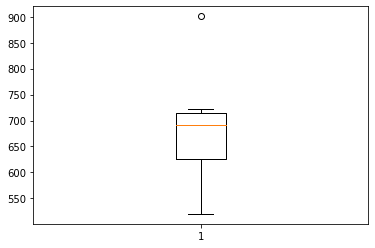

In [34]:
# boxplot after removing the outliers
plt.boxplot(df1["performance_score"])
plt.show()

Now we can see that we removed outlier from the performance_score feature

### 9. Check the gender column and do Dummy encoding.

In [35]:
df1['gender'].value_counts()

F    6
M    2
Name: gender, dtype: int64

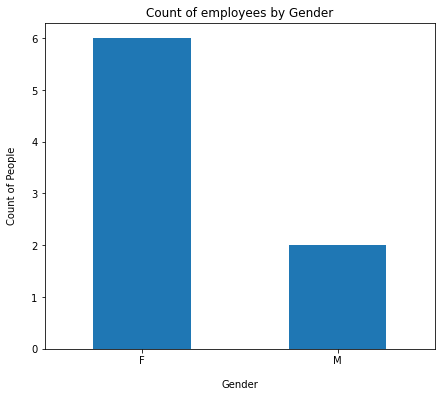

In [36]:
df1['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of employees by Gender")
plt.show()

In [37]:
# check the number of unique values in the gender
df1.gender.nunique()

2

In [38]:
# dummification 
dummy = pd.get_dummies(df1)
dummy

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52000.0,723,1,0,0,1,0,0,0,1,0
S Kumar,45.0,16000.0,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.0,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.0,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.0,711,1,0,0,1,0,0,1,0,0
Satyam Sharma,45.0,62000.0,649,1,0,0,0,1,0,0,1,0
Josh Wills,54.0,52000.0,901,1,0,1,0,0,0,0,1,0
Leo Duck,23.0,98000.0,709,0,1,0,0,1,0,0,0,1


### 10. Do the standard scaling on the feature performance score.

In [39]:
X = dummy

In [40]:
X = pd.DataFrame(X)

In [41]:
type(X)

pandas.core.frame.DataFrame

In [42]:
X.describe()

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52750.000000,680.37500,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24099.496142,116.16729,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,520.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,625.75000,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52000.000000,691.50000,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,714.00000,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,901.00000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


There are three Scaling method in the preprocessing
1. Standard Scaler
2. Min Max Scaler
3. Normalization

### 1. Standard Scaler

In [43]:
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()
X = standardization.fit_transform(X)

In [44]:
X = pd.DataFrame(X)

In [45]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00
mean,-2.775558e-17,0.000000,4.857226e-17,2.775558e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17,-6.938894e-17,-2.775558e-17,0.000000,-5.551115e-17
std,1.069045e+00,1.069045,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045,1.069045e+00
min,-1.744151e+00,-1.630217,-1.475872e+00,-1.732051e+00,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01
25%,-8.656157e-01,-0.554495,-5.026938e-01,0.000000e+00,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01
50%,5.297052e-01,-0.033270,1.023793e-01,5.773503e-01,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,0.000000,-3.779645e-01
75%,5.297052e-01,0.443596,3.094385e-01,5.773503e-01,0.000000e+00,1.290994e+00,0.000000e+00,1.290994e+00,-3.779645e-01,0.000000e+00,1.000000,-3.779645e-01
max,1.459919e+00,2.007274,2.030331e+00,5.773503e-01,1.732051e+00,1.290994e+00,1.732051e+00,1.290994e+00,2.645751e+00,1.732051e+00,1.000000,2.645751e+00


In [46]:
y = dummy['performance_score']
X = dummy.drop('performance_score', axis=1)

In [47]:
# train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
# Linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [49]:
# MSE and R Squared
from sklearn.metrics import mean_squared_error, r2_score
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  22142.060576447315
R Squared is:  -4.322290866281429


### 2. Min Max Scaler

In [50]:
X = dummy.drop('performance_score', axis=1)

In [51]:
X.describe()

,age,income,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52750.000000,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24099.496142,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52000.000000,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [52]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)

In [53]:
X = pd.DataFrame(X)

In [54]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,0.544355,0.448171,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,0.333652,0.293896,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.274194,0.295732,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.709677,0.439024,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,0.709677,0.570122,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

# MSE and R Squared
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  103710.98274661307
R Squared is:  -23.929026560089675


### 3. Normalization

In [56]:
X = dummy.drop('performance_score', axis=1)

In [57]:
X.describe()

,age,income,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52750.000000,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24099.496142,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52000.000000,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [58]:
X = preprocessing.normalize(X)

In [59]:
X = pd.DataFrame(X)

In [60]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.001000,0.999999,0.000020,0.000005,0.000014,0.000005,0.000005,0.000008,0.000007,0.000009,0.000001
std,0.000770,0.000001,0.000019,0.000010,0.000023,0.000010,0.000007,0.000022,0.000012,0.000009,0.000004
min,0.000235,0.999996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000709,1.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000796,1.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000
75%,0.000945,1.000000,0.000020,0.000003,0.000022,0.000005,0.000011,0.000000,0.000006,0.000017,0.000000
max,0.002812,1.000000,0.000062,0.000029,0.000062,0.000024,0.000016,0.000062,0.000029,0.000019,0.000010


In [61]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

# MSE and R Squared
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  256752.47585125113
R Squared is:  -60.715636284177904
